<a href="https://colab.research.google.com/github/MachineTech2022/Australia/blob/main/Caso_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASO AUSTRALIA MINERÍA DE DATOS

####Felipe Muñoz


##Introducción

El Proyecto está centrado principalmente en datos meteorológicos del país de Australia que es el continente más seco del mundo. En los primeros procesos de este proyecto nos dedicaremos a comprender el problema o problemas que se presentan en el país de Australia y al reconocimiento de datos y búsqueda de patrones en esta primera etapa para reconocer la importancia y patrones de este y en un futuro poder darle un valor práctico y posibles predicciones según el enfoque de los estudios que se realizarán usando la metodología CRISP-DM
Más adelante ya estudiado los datos se verá si que datos son importantes para los futuros modelos se evaluará los datos si son importantes o no y en este punto si es necesario se hará un tratamiento para generar mejores resultados.
Para finalizar se entregarán los modelos y se evaluarán los resultados y si el cliente lo requiere se hará un despliegue de producción para poder aprovechar al máximo el trabajo realizado.



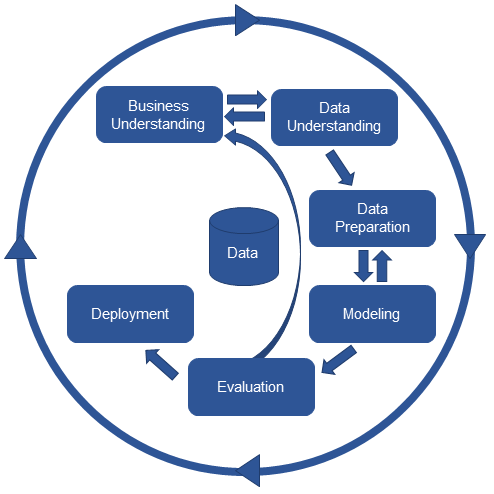

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame
from seaborn import boxplot
import seaborn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


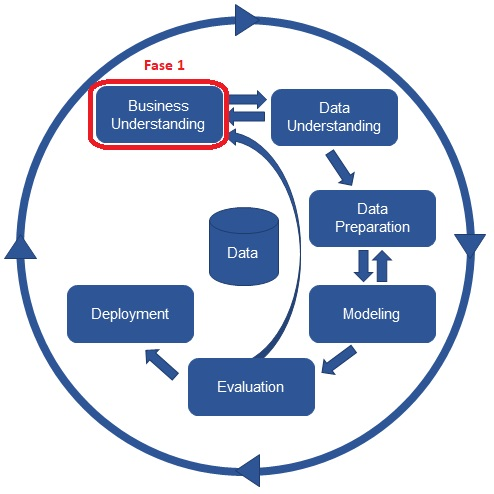

##Comprensión del negocio 
Se nos han entregado una cantidad de datos meteorológicos recolectados para ser estudiados de Australia que se distingue por ser el continente más seco del planeta una gran parte de su extensión es desértica y árida pero tenemos diversos climas en este lugar para esto se nos han entregado información externa sobre su geografía y población para dar un contexto más profundo a esto.
Acá nos encontramos con las columnas y descripciones que se entregan en el dataset para su mayor comprensión en español.


In [ ]:
#Linea para llamarla cuando necesitemos recordar alguna descripción de las columnas
guia = " Date: Fecha de observación\n Location: Ubicación de la estación metereológica\n MinTemp: Temperatura mínima en grados celsius\n MaxTemp: Temperatura máxima en grados Celsius\n Rainfall: Cantidad de lluvia registrada ese día en mm.\n Evaporation: Evaporación (mm) en 24 horas\n Sunshine: Número de horas de sol brillante en el día\n WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas.\n WindGustSpeed: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas."

print(guia)

 Date: Fecha de observación
 Location: Ubicación de la estación metereológica
 MinTemp: Temperatura mínima en grados celsius
 MaxTemp: Temperatura máxima en grados Celsius
 Rainfall: Cantidad de lluvia registrada ese día en mm.
 Evaporation: Evaporación (mm) en 24 horas
 Sunshine: Número de horas de sol brillante en el día
 WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas.
 WindGustSpeed: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Mineria de datos/ET/weatherAUS.csv')
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


##Análisis de Datos

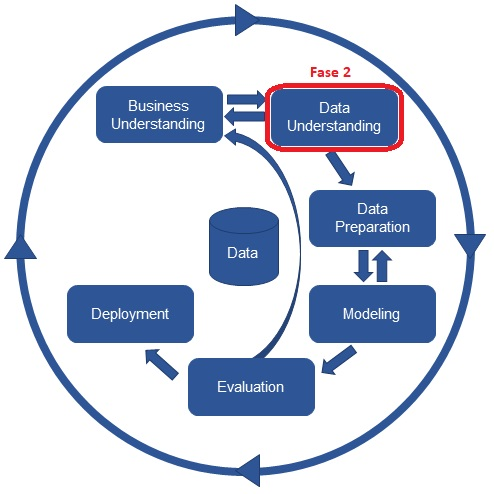

### Conocimiento de outliers

In [ ]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Lo que se pudo observar en conjunto al describe vemos que al contarlos hay grandes diferencias entre columnas, varias se encuentran alrededor de 140.000 pero ya que todas son diferentes podemos observar que hay valores NaN en estas columnas que procederemos a evaluar. 

Columnas con posibles outliers debido a las diferencias abrumadoras que hay entre los últimos cuartiles con respecto al resto.
 * RainFall
 * Evaporation
 * WindGustSpeed
 * WindSpeed9am
 * WindSpeed3pm
 * RISK_MM

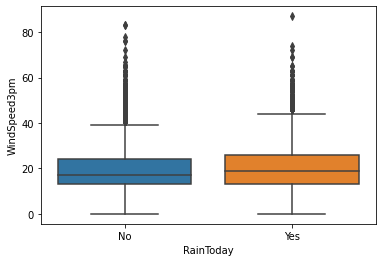

In [ ]:
seaborn.boxplot(y=dataset.WindSpeed3pm, x= dataset.RainToday)

En el gráfico anterior podemos analizar que la mayoría de outliers por rafaga de viento a las 3pm están por encima de los 40 km/hr y que esto no influye a la hora de que llueva ese día.

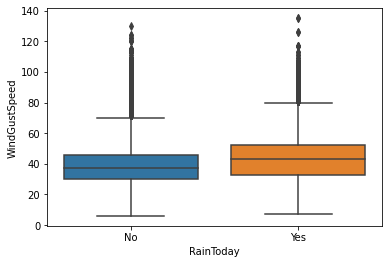

In [ ]:
seaborn.boxplot(y=dataset.WindGustSpeed, x= dataset.RainToday)

En el gráfico de caja que podemos visualizar en la parte superior nos damos cuenta que las velocidades de los vientos que hubo ese dia son mayores cuando llueve, además de que la mayoría de outliers se encuentran ubicados en el 70, esto significa que la velocidad de los vientos son mayores a 70 km/hr, esto puede darse a la llanura del terreno.

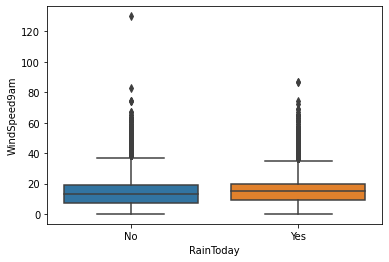

In [ ]:
seaborn.boxplot(x= dataset.RainToday,y=dataset.WindSpeed9am)


En el gráfico anterior podemos analizar que la mayoría de outliers por rafaga de viento a las 9am están por encima de los 35 km/hr y que esto no influye a la hora de que llueva ese día, otra cosa importante a destacar es el outlier que tiene una potencia de rafaga de viento mayor a 120 km/hr sin siquiera que haya llovido ese día.


### Analisis de missing values

In [ ]:
#Para reconocer la cantidad de nulos en el dataset
dataset.isnull().sum().sum()

316559

In [ ]:
#Codigo de reconocimiento de nulos por columnas independientes
dataset.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Como se menciono anteriormente en el analisis del describe pudimos observar los nulos por encima, aqui ya confirmamos la cantidad de nulos de cada columna tomando asi que la columna de sunshine es la que contiene mas datos nulos, esto puede ser porque quizas no hubo sol brillante en ningun momento del dia, se analizara y de ser ese el caso se remplazara por 0


In [ ]:
dataset[dataset['Sunshine']==0]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
5983,2009-02-14,Cobar,16.1,19.1,26.0,6.6,0.0,ESE,54.0,ESE,...,93.0,1014.3,1013.2,7.0,7.0,17.1,17.0,Yes,7.0,Yes
5985,2009-02-16,Cobar,17.4,19.7,0.0,6.0,0.0,ESE,48.0,SE,...,97.0,1011.2,1010.7,7.0,7.0,19.2,17.1,No,32.6,Yes
6038,2009-04-10,Cobar,16.5,20.6,14.4,6.0,0.0,E,30.0,NE,...,76.0,1021.3,1019.3,7.0,7.0,16.9,19.9,Yes,2.4,Yes
6077,2009-05-19,Cobar,12.8,14.7,7.6,4.6,0.0,NE,41.0,ENE,...,91.0,1018.7,1015.6,8.0,8.0,13.9,13.7,Yes,17.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139001,2017-03-05,Darwin,24.5,28.4,55.0,NaN,0.0,ESE,59.0,E,...,86.0,1002.7,1000.2,8.0,7.0,24.8,27.9,Yes,32.2,Yes
139037,2017-04-10,Darwin,25.1,31.8,1.2,4.6,0.0,SE,54.0,SE,...,55.0,1007.6,1003.8,6.0,7.0,26.6,31.5,Yes,23.4,Yes
139038,2017-04-11,Darwin,20.6,21.9,23.4,6.4,0.0,SSE,52.0,S,...,95.0,1007.4,1003.9,8.0,8.0,21.1,19.0,Yes,65.8,Yes
139053,2017-04-26,Darwin,25.4,29.2,0.0,5.4,0.0,ESE,26.0,ESE,...,66.0,1011.0,1007.9,7.0,7.0,26.8,28.9,No,0.2,No


Pudimos observar que la idea de los nulos de sunshine no necesariamente es porque no hubo sol durante el dia sino que puede ser por otra razon ya que hay registros con sunshine 0

### Manejo de datos

Se realiza pequeño manejo de datos para utilizar en el análisis posterior

In [ ]:
llovio = { 'No': 0, 'Yes': 1 }
df=dataset
df['RainToday'] = df['RainToday'].replace(llovio)
df['RainTomorrow'] = df['RainTomorrow'].replace(llovio)
df["RainToday"].value_counts()

0.0    109332
1.0     31455
Name: RainToday, dtype: int64

### Conociendo datos importantes

In [ ]:
#Cantidad de Filas/Columnas
dataset.shape

(142193, 24)

In [ ]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [ ]:
diaMaxLuvioso = dataset[dataset['Rainfall'] == 371].Date
print('El dia que mas llovio fue: ' + diaMaxLuvioso)

9236    El dia que mas llovio fue: 2009-11-07
Name: Date, dtype: object


In [ ]:
df.sort_values(by = 'Date').iloc[[0,142192]]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0.0,3.6,1
35838,2017-06-25,SydneyAirport,6.8,19.5,0.0,3.4,9.4,WSW,46.0,NW,...,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0.0,0.0,0


En este extracto de datos podemos ver la primera y ultima fecha para poder reconocer la extensidad de tiempo que han sido recolectado los datos y tener un contexto mas claro del tiempo 

In [ ]:
lluviaXDia=DataFrame( df[df['RainToday'] == 1].groupby('Location').size()).sort_values(by= 0, ascending= False)
lluviaXDia =  lluviaXDia.rename(columns={'Location':'Location', 0:'Total_Dias'})
lluviaXDia

,Total_Dias
Location,
Portland,1088
Cairns,941
Walpole,928
Dartmoor,921
MountGambier,919
NorfolkIsland,912
Albany,893
Witchcliffe,871
Sydney,866


En estos datos nos encontramos con los días que ha llovido a lo largo de los años en Australia por ciudad. Siendo la ciudad que mas a llovido Portland y también nos hemos percatado que entre las 3 ciudades que están en el top no son ciudades vecinas ni cercanas lo que si todas ellas son ciudades costeras (imágenes mostradas a continuación), lo que podría indicar que en las costas de australia llueve más.

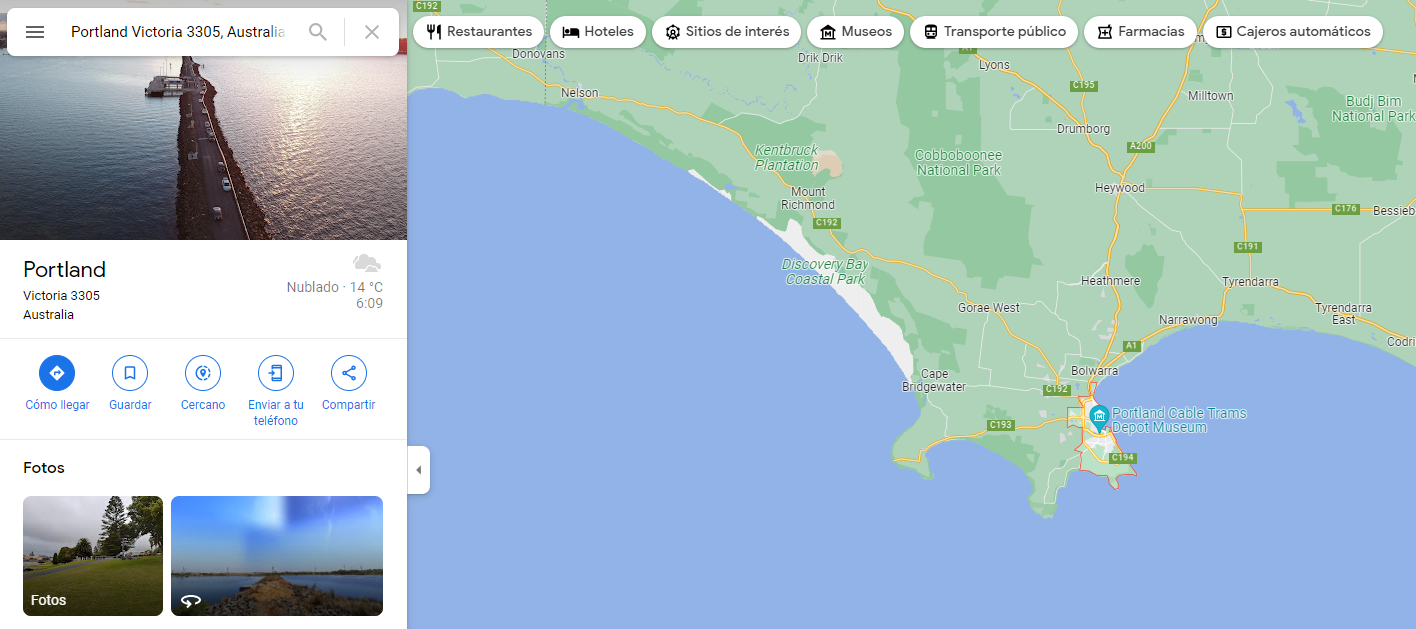 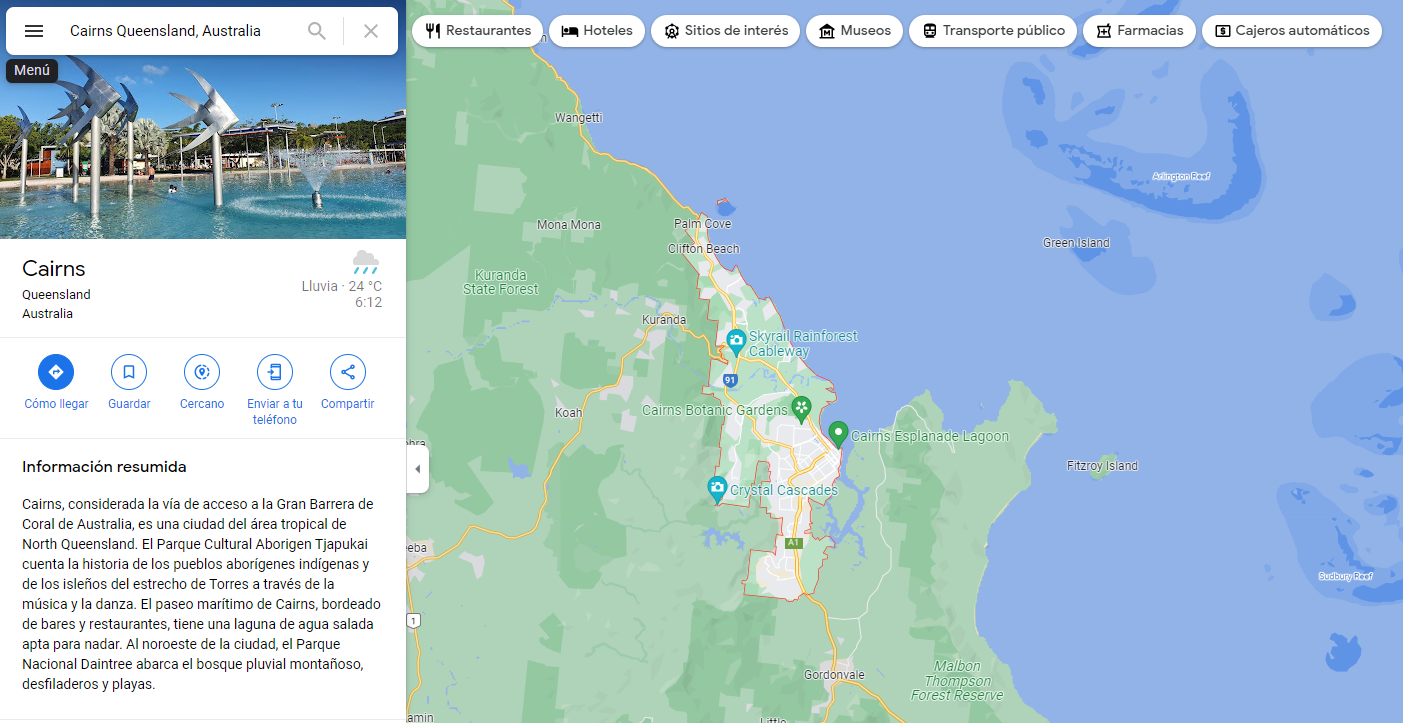 
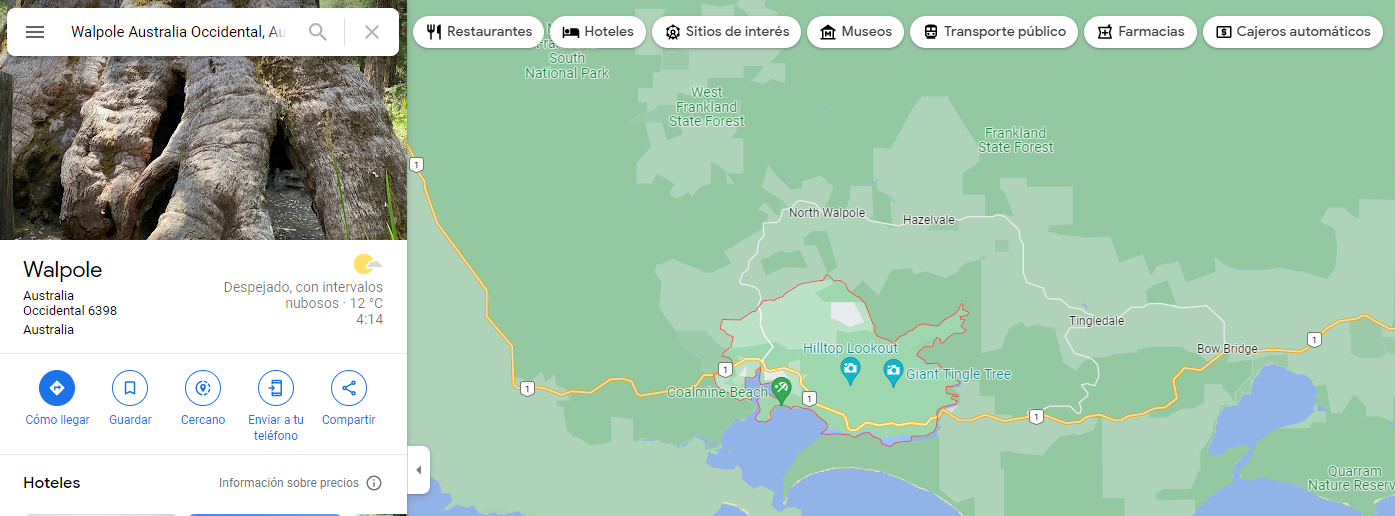

In [ ]:
TempLocation = DataFrame(dataset[['Temp9am','Location']].groupby('Location').mean()).sort_values(by= 'Temp9am')
dfPCW2 = TempLocation.loc[['Portland','Cairns','Walpole']]
dfTL2= TempLocation.head()
dfTL2 = dfTL2.append(dfPCW2)
dfTL2=dfTL2.sort_values(by= 'Temp9am')
dfTL2

,Temp9am
Location,
MountGinini,6.890845
Ballarat,11.664125
Launceston,12.027348
Hobart,12.464073
Tuggeranong,12.582069
Portland,13.192164
Walpole,16.039297
Cairns,25.799465


Nos podemos dar cuenta que las ciudades que más llueven no necesariamente tienen las temperaturas más bajas en la mañana, por lo que, investigaremos si influyen las temperaturas de la tarde.
A continuación se mostrará gráfico con respecto a las temperaturas de las 5 ciudades con temperatura más fría y junta a las temperaturas de las ciudades que más llueven


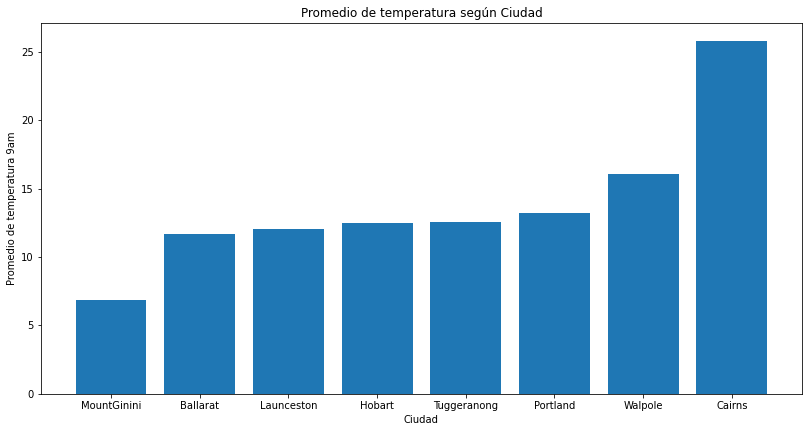

In [ ]:
plt.figure(figsize=(30, 15))

ax = plt.subplot(2,2, 1)

plt.xlabel('Ciudad')
plt.ylabel('Promedio de temperatura 9am')
plt.title('Promedio de temperatura según Ciudad')
ax.bar(dfTL2.index,dfTL2.Temp9am)
plt.show()

Como se puede observar las ciudades que más llueven(Portland, Walpole y Cairns) tienen temperaturas más altas con respecto a las 5 primeras más frías, es decir no están dentro de estas.

In [ ]:
TempLocation = DataFrame(dataset[['Temp3pm','Location']].groupby('Location').mean()).sort_values(by= 'Temp3pm')
dfPCW3 = TempLocation.loc[['Cairns','Walpole']]
dfTL3 = TempLocation.head()
dfTL3 = dfTL3.append(dfPCW3)
dfTL3=dfTL3.sort_values(by= 'Temp3pm')
dfTL3

,Temp3pm
Location,
MountGinini,10.277890
Hobart,16.173164
Portland,16.509115
Ballarat,16.776447
Launceston,17.688348
Walpole,18.667590
Cairns,27.896653


En esta parte del estudio se puede notar que el promedio de la temperatura de las ciudades a las 3pm quizás si afecta en sí llovió ese día, ya que portland se encuentra en el tercer promedio más bajo.

A continuación se mostrará gráfico con la siguiente información.

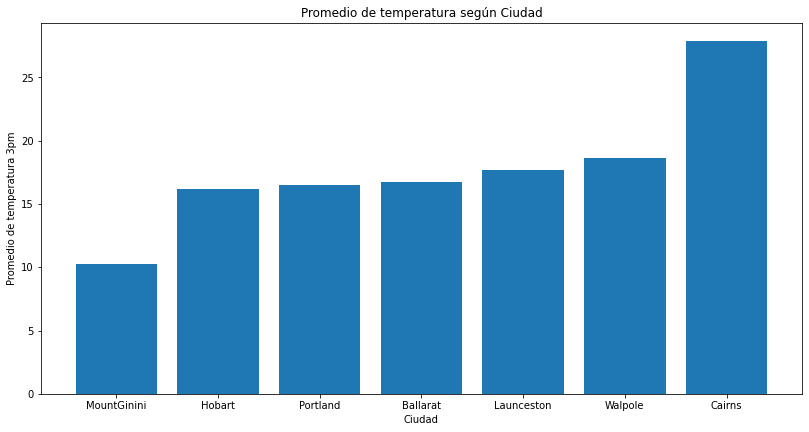

In [ ]:
plt.figure(figsize=(30, 15))

ax = plt.subplot(2,2, 1)

plt.xlabel('Ciudad')
plt.ylabel('Promedio de temperatura 3pm')
plt.title('Promedio de temperatura según Ciudad')
ax.bar(dfTL3.index,dfTL3.Temp3pm)
plt.show()

In [ ]:
maxTemperatura = dataset.sort_values('MaxTemp', ascending=False).head(5)
maxTemperatura[['Location','MaxTemp','Date']]

,Location,MaxTemp,Date
103729,Woomera,48.1,2011-01-25
13601,Moree,47.3,2014-01-03
14600,Moree,47.3,2017-02-12
29363,Richmond,47.0,2017-02-11
26415,Penrith,46.9,2017-02-11


En esta extracción de datos podemos ver el top de temperaturas más altas en australia nos encontramos con que Woomera es la ciudad con temperatura más alta siendo una ciudad más árida que las demás y también podemos notar que el año 2017 entre el 11 y 12 de febrero se generaron temperaturas muy altas en ciudades más cercanas al mar.

In [ ]:
a = 2007
dflluvias= DataFrame(columns=('Año','Total_lluvia'))
while a <=2017:

  lluviaAño = dataset[dataset['Date'].astype('str').str.contains(str(a))==True]
  lluvia = lluviaAño.RainToday[lluviaAño['RainToday']==1].count()
  print('Las lluvias del año ' + str(a) +': ' + str(lluvia))
  insert={'Año':a,'Total_lluvia':lluvia}
  dflluvias = dflluvias.append(insert,ignore_index=True) 
  a +=1

Las lluvias del año 2007: 19
Las lluvias del año 2008: 511
Las lluvias del año 2009: 3566
Las lluvias del año 2010: 3953
Las lluvias del año 2011: 3691
Las lluvias del año 2012: 3340
Las lluvias del año 2013: 3410
Las lluvias del año 2014: 3496
Las lluvias del año 2015: 3604
Las lluvias del año 2016: 4124
Las lluvias del año 2017: 1741


In [ ]:
a = 2007
dftemp= DataFrame(columns=('Año','Temp_max'))
while a <=2017:

  temA = dataset[dataset['Date'].astype('str').str.contains(str(a))==True]
  temp = temA.MaxTemp.max()
  print('La temperatura mas alta de ' + str(a) +' fue ' + str(temp))
  insert={'Año':a,'Temp_max':temp}
  dftemp = dftemp.append(insert,ignore_index=True) 
  a +=1

La temperatura mas alta de 2007 fue 35.0
La temperatura mas alta de 2008 fue 40.9
La temperatura mas alta de 2009 fue 46.8
La temperatura mas alta de 2010 fue 45.7
La temperatura mas alta de 2011 fue 48.1
La temperatura mas alta de 2012 fue 45.5
La temperatura mas alta de 2013 fue 46.5
La temperatura mas alta de 2014 fue 47.3
La temperatura mas alta de 2015 fue 45.4
La temperatura mas alta de 2016 fue 45.1
La temperatura mas alta de 2017 fue 47.3


### Analisis por año

###Conclusión análisis de datos

Bueno mediante la investigación dada en este caso pudimos conocer los datos en general características de ellos, outliers, datos importantes y mucho más. En este caso hemos decidido seleccionar como un target a futuro RainTomorrow y predecir según datos correlacionados con este para generar predicciones de forma que nos entregue buenos resultados, ya conocemos que hay columnas importantes para poder predecir si el dia de mañana lloverá o no, podemos tomar como referencia columnas asociadas a la humedad y también los vientos para tomar decisiones 
Para finalizar en la siguiente fase tomando la metodología CRISP-DM haremos el tratamiento de nulos y transformación de columnas necesarias para poder modelar en el futuro, como tenemos un target de tipo object, como objetivo creemos que la mejor decisión es tomar un modelo de clasificación ya que nos dará mejores resultados.


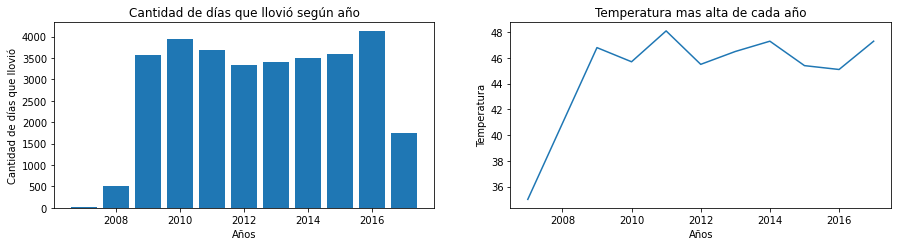

In [ ]:
plt.figure(figsize=(15, 7.5))

ax = plt.subplot(2,2, 1)

plt.xlabel('Años')
plt.ylabel('Cantidad de días que llovió')
plt.title('Cantidad de días que llovió según año')
ax.bar(dflluvias.Año,dflluvias.Total_lluvia)
print()
ax = plt.subplot(2,2, 2)
plt.xlabel('Años')
plt.ylabel('Temperatura')
plt.title('Temperatura mas alta de cada año')
ax.plot(dftemp.Año,dftemp.Temp_max)

plt.show()

In [ ]:
dflluvias

,Año,Total_lluvia
0,2007,19
1,2008,511
2,2009,3566
3,2010,3953
4,2011,3691
5,2012,3340
6,2013,3410
7,2014,3496
8,2015,3604
9,2016,4124


##Data Preparation  /  Análisis de datos y Selección de características

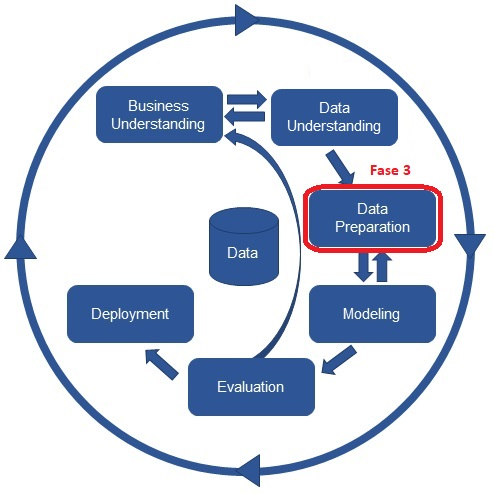

###Reducción de la data

Este proceso nos a ayudara a obtener resultados mas confiables, un error peligroso al realizar un análisis es no equilibrar la data y no evaluar sus outliers ni tratar los nulos ya que esto nos causara modelos de predicción no óptimos en un futuro el mantener una data desequilibrada, también nos puede causar sesgos en un futuro análisis de los resultados es por esto que lo ideal de una data es que tenga datos homogéneos, pero esto rara vez sucede.

Se reducira la data para tomar solamente las columnas necesarias para las futuras predicciones se ha seleccionado el target de RainTomorrow y tambien hemos decidido trabajar con los datos de el top de 5 ciudades que mas llueve, lo cual, todas son ciudades costeras de australia de esta manera limitaremos los datos con los que trabajaremos.

Las columnas seleccionadas fueron:



*   Date
*   Location
*   Rainfall
*   Temp9am
*   Temp3pm
*   Evaporation
*   Humidity9am
*   Humidity3pm
*   Pressure9pm
*   Pressure3pm
*   Cloud9am
*   Cloud3pm
*   RainToday
*   RainTomorrow













In [ ]:
dfPreparacion = df[['Date','Location','Rainfall','Temp9am','Temp3pm','Evaporation','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow']]

In [ ]:
var = lluviaXDia.head(5).index
df_reduc = pd.DataFrame()
for i in var:
  df_reduc = df_reduc.append(dfPreparacion[(dfPreparacion['Location'] == str(i))])

###Imputando Datos

In [ ]:
df_reduc.isna().sum()

Date               0
Location           0
Rainfall          97
Temp9am           53
Temp3pm           20
Evaporation     4375
Humidity9am      260
Humidity3pm      219
Pressure9am       16
Pressure3pm       19
Cloud9am        6462
Cloud3pm        6594
RainToday         97
RainTomorrow       0
dtype: int64

In [ ]:
#Usando Knn imputer se hace tratamiento de los nulos
columnas = df_reduc.columns
for i in columnas:
  if i != 'Location' and i != 'RainToday'and i != 'Date':
    knn = KNNImputer(n_neighbors=5,weights="uniform")
    neighbors = knn.fit(df_reduc[[i]])

    
    df_reduc[i] = knn.transform(df_reduc[[i]]).ravel()
df_reduc.isna().sum()

Date             0
Location         0
Rainfall         0
Temp9am          0
Temp3pm          0
Evaporation      0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday       97
RainTomorrow     0
dtype: int64

Se a decidido imputar la mayoria de datos con KNN dejando a parte Location que es un dato de tipo object y RainToday ya que en este solo existen 2 resultados posibles que seria 1 o 0 y si utilizamos KNN en este dato nos daria un resultado del promedio de los vecinos.

In [ ]:
df_reduc=df_reduc.dropna()

Se tomo la decision de eliminar los NaN en la columna de RainToday para no inventar datos de si llovio o no en un dia especifico ya que esto podria alterar los resultados de las futuras predicciones.

### Calculando la presión 

Luego de la fase de manejo de datos, pudimos observar un error con respecto a la columna de presión, que es la presión atmosférica, la presión atmosférica no puede ser mayo a 1.013 milibares, de lo contrario estaría bajo el nivel del mar.

In [ ]:
alt = df_reduc[['Location']]
altura= alt.rename(columns={'Location':'Altitud'})
altura

df_reduc = pd.concat([df_reduc,altura], axis=1)

In [ ]:
altitud = { 'Portland': 31, 'Cairns': 7, 'Walpole': 20, 'Dartmoor': 39, 'MountGambier': 41 }

df_reduc['Altitud'] = df_reduc['Altitud'].replace(altitud)

In [ ]:
df_Presion = df_reduc.copy() 
ciclo =df_Presion.shape[0]
df_Presion.assign(Pressure= np.nan)
for i in range(0,ciclo): 
  fecha = df_Presion.iloc[i,0]
  a = df_Presion.iloc[i,14]

  t9 = df_Presion.iloc[i,3]
  t3 = df_Presion.iloc[i,4]

  temp = (t9+t3)/2

  presion = 1013.25 * (1-0.0000225577 *a)**temp
  df_Presion.loc[df_Presion['Date'] == fecha, 'Pressure'] = presion

df_Presion = df_Presion.drop(['Pressure9am'], axis=1)
df_Presion = df_Presion.drop(['Pressure3pm'], axis=1)


In [ ]:
df_avg = df_reduc.copy() 
ciclo =df_avg.shape[0]
df_avg.assign(avg_Temp= np.nan,
              Pressure= np.nan,
              Humidity= np.nan,
              Cloud= np.nan)

for i in range(0,ciclo): 
  fecha = df_avg.iloc[i,0]
  a = df_avg.iloc[i,14]
  t9 = df_avg.iloc[i,3]
  t3 = df_avg.iloc[i,4]
  h9 = df_avg.iloc[i,6]
  h3 = df_avg.iloc[i,7]
  c9 = df_avg.iloc[i,10]
  c3 = df_avg.iloc[i,11]

  temp = (t9+t3)/2
  Humidity = (h9+h3)/2
  Cloud = (c9+c3)/2
  presion = 1013.25 * (1-0.0000225577 *a)**temp

  df_avg.loc[df_avg['Date'] == fecha, 'avg_Temp'] = temp
  df_avg.loc[df_avg['Date'] == fecha, 'Pressure'] = presion
  df_avg.loc[df_avg['Date'] == fecha, 'Cloud'] = round(Cloud)
  df_avg.loc[df_avg['Date'] == fecha, 'Humidity'] = Humidity

  # print(round(presion9,1))
# df_avg = df_avg.drop(['Temp9am'], axis=1)
# df_avg = df_avg.drop(['Temp3pm'], axis=1)
df_avg = df_avg.drop(['Humidity9am'], axis=1)
df_avg = df_avg.drop(['Humidity3pm'], axis=1)
df_avg = df_avg.drop(['Pressure9am'], axis=1)
df_avg = df_avg.drop(['Pressure3pm'], axis=1)
df_avg = df_avg.drop(['Cloud9am'], axis=1)
df_avg = df_avg.drop(['Cloud3pm'], axis=1)
df_avg

,Date,Location,Rainfall,Temp9am,Temp3pm,Evaporation,RainToday,RainTomorrow,Altitud,avg_Temp,Pressure,Cloud,Humidity
72756,2009-01-01,Portland,0.0,13.7,14.5,4.800000,0.0,1.0,31,15.45,998.867841,6.0,54.5
72757,2009-01-02,Portland,1.6,11.9,14.0,4.800000,1.0,0.0,31,16.45,997.944022,3.0,42.5
72758,2009-01-03,Portland,0.2,11.6,17.5,4.600000,0.0,0.0,31,17.30,997.159448,5.0,44.0
72759,2009-01-04,Portland,0.0,14.7,18.1,4.800000,0.0,0.0,31,20.25,994.441297,2.0,50.0
72760,2009-01-05,Portland,0.0,14.9,18.0,5.600000,0.0,0.0,31,19.05,995.546091,4.0,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,2017-06-20,MountGambier,0.0,8.7,15.5,4.118931,0.0,1.0,41,12.10,1001.968869,5.0,79.5
99972,2017-06-21,MountGambier,2.0,11.1,12.0,4.118931,1.0,0.0,41,11.55,1002.478912,7.0,90.0
99973,2017-06-22,MountGambier,0.0,10.0,14.9,4.118931,0.0,0.0,41,12.45,1001.644431,7.0,79.5
99974,2017-06-23,MountGambier,0.0,6.4,14.9,4.118931,0.0,1.0,41,10.65,1003.314089,6.0,80.0


### Analisis comparativo de la data

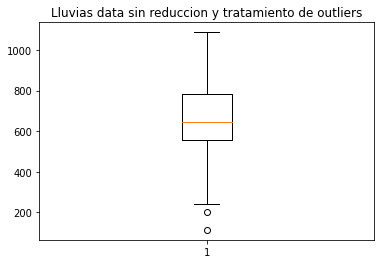

In [ ]:
df_prep_lluvia=DataFrame( df[df['RainToday'] == 1].groupby('Location').size()).sort_values(by= 0, ascending= False)
df_prep_lluvia =  df_prep_lluvia.rename(columns={'Location':'Location', 0:'Total_Dias'})
fig1, ax1 = plt.subplots()
ax1.set_title('Lluvias data sin reduccion y tratamiento de outliers')
ax1.boxplot(df_prep_lluvia.Total_Dias)
plt.show()

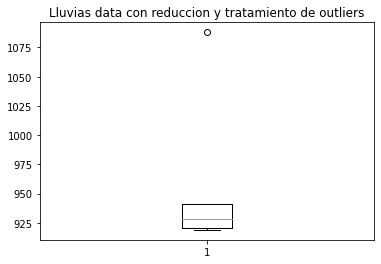

In [ ]:
df_reduc_lluvia=DataFrame( df_reduc[df_reduc['RainToday'] == 1].groupby('Location').size()).sort_values(by= 0, ascending= False)
df_reduc_lluvia =  df_reduc_lluvia.rename(columns={'Location':'Location', 0:'Total_Dias'})
fig1, ax1 = plt.subplots()
ax1.set_title('Lluvias data con reduccion y tratamiento de outliers')
ax1.boxplot(df_reduc_lluvia.Total_Dias)
plt.show()

Como se puede observar en los gráficos de caja hubo una variación en la data esto debido al tratamiento hecho previamente para usar las 3 ciudades costeras en las cuales mas llueve, otra de las concideraciones a tomar en cuenta fue la eliminacion de los outliers con respecto a la cantidad de dias que llovio.

In [ ]:
dfPreparacion.describe()

,Rainfall,Temp9am,Temp3pm,Evaporation,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
count,140787.000000,141289.000000,139467.000000,81350.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,140787.000000,142193.000000
mean,2.349974,16.987509,21.687235,5.469824,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,0.223423,0.224181
std,8.465173,6.492838,6.937594,4.188537,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,0.416541,0.417043
min,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.300000,16.600000,2.600000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,16.700000,21.100000,4.800000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,0.000000,0.000000
75%,0.800000,21.600000,26.400000,7.400000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,0.000000,0.000000
max,371.000000,40.200000,46.700000,145.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,1.000000,1.000000


In [ ]:
df_avg.describe()

,Rainfall,Temp9am,Temp3pm,Evaporation,RainToday,RainTomorrow,Altitud,avg_Temp,Pressure,Cloud,Humidity
count,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000
mean,3.081531,16.286107,19.896965,4.119132,0.326793,0.327066,27.738606,15.986060,998.386823,5.497854,66.472929
std,9.702370,6.296906,6.492783,2.484030,0.469057,0.469158,12.724598,5.133619,4.732256,2.159748,16.352803
min,0.000000,-0.300000,5.300000,0.000000,0.000000,0.000000,7.000000,5.850000,978.558881,0.000000,10.000000
25%,0.000000,11.500000,14.500000,2.400000,0.000000,0.000000,20.000000,12.000000,995.592150,4.000000,55.500000
50%,0.200000,15.000000,18.700000,4.118931,0.000000,0.000000,31.000000,15.150000,999.145153,6.000000,68.000000
75%,2.200000,20.400000,25.200000,5.000000,1.000000,1.000000,39.000000,19.000000,1002.061585,7.000000,79.000000
max,278.400000,35.200000,44.100000,44.400000,1.000000,1.000000,41.000000,37.650000,1007.780128,8.000000,97.500000


Acá en el describe podemos notar un gran cambio en los datos estadísticos generales, ya que la reducción de datos juega un gran papel en esto, cabe destacar que solo estamos comparando las columnas que han sido seleccionadas para los futuros modelos, podemos notar un cambio significativo en los percentiles asociados a los outliers notamos que los máximos han descendido equilibrando un poco mas la data. 

En el siguiente análisis veremos como cambiaron los gráficos antes y después de la preparación de la data

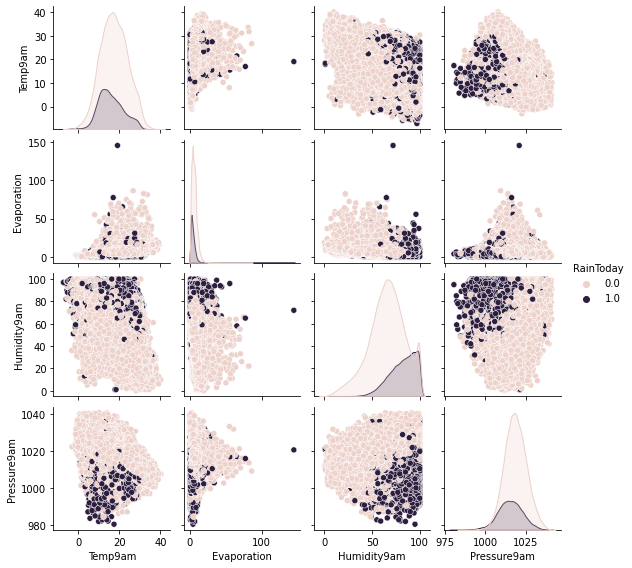

In [ ]:
sns.pairplot(dfPreparacion, hue= 'RainToday', vars=['Temp9am','Evaporation','Humidity9am','Pressure9am'],height=2,kind='scatter')
plt.show()

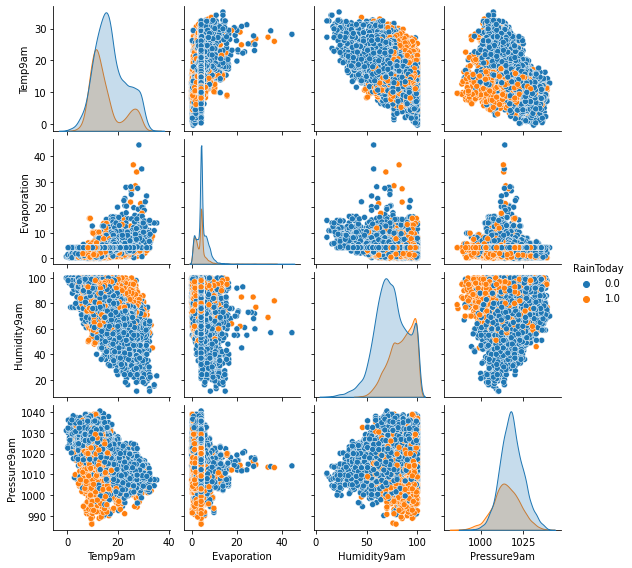

In [ ]:
sns.pairplot(df_reduc, hue= 'RainToday', vars=['Temp9am','Evaporation','Humidity9am','Pressure9am'],height=2,kind='scatter')
plt.show()

Podemos observar que los gráficos varían bastante y la data de si llovió o no en un día en especifico esta más equilibrada además de que a simple vista pareciera haber mas outliers que antes, pero esto se produce por la cantidad de datos reducidos también hay que tomar en cuenta que los outliers sin la data corregida no nos servían para la futuros análisis como en el caso de evaporación que se ven outliers que superan los 100 mm de evaporación en 24 horas que se separa demasiado de la media, en cambio ahora tenemos outliers cercanos a la media que se dan producto de que no es común tener evaporación a diario en estos sectores. 

###Conclusión Preparación de datos 

In [ ]:
df_reduc.describe()

,Rainfall,Temp9am,Temp3pm,Evaporation,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Altitud
count,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000,14679.000000
mean,3.081531,16.286107,19.896965,4.119132,76.979681,62.670929,1017.112500,1015.348435,5.446568,5.298790,0.326793,0.327066,27.738606
std,9.702370,6.296906,6.492783,2.484030,15.305808,16.843232,7.359721,7.355089,1.910465,1.892757,0.469057,0.469158,12.724598
min,0.000000,-0.300000,5.300000,0.000000,11.000000,4.000000,986.200000,985.100000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,0.000000,11.500000,14.500000,2.400000,66.000000,53.000000,1012.400000,1010.500000,5.448400,5.299316,0.000000,0.000000,20.000000
50%,0.200000,15.000000,18.700000,4.118931,77.000000,63.000000,1017.100000,1015.200000,5.448400,5.299316,0.000000,0.000000,31.000000
75%,2.200000,20.400000,25.200000,5.000000,90.000000,73.000000,1021.900000,1020.300000,7.000000,7.000000,1.000000,1.000000,39.000000
max,278.400000,35.200000,44.100000,44.400000,100.000000,100.000000,1040.400000,1037.700000,8.000000,8.000000,1.000000,1.000000,41.000000


Durante la primera parte de este proceso redujimos la data y de esta manera nos enfocamos en una parte especifica de los datos para esto tomamos las 3 ciudades en las que más llovía en este punto se genero una reducción de outliers en la data quedando una cantidad significativa de outliers en la columna Evaporation se ah decidido mantener estos outliers ya que, a la mínima que existan cambios de temperatura excesivos de estos se generan, pero se han considerado importantes por que esto nos puede dar una predicción del clima al día siguiente.

En segundo lugar, se han imputado la mayoría de los datos utilizando KNN en este proceso, ya que la mayoría de las columnas tenían en común que eran de tipo float y al aplicar este tipo de proceso no generaría problemas en un futuro. Por consiguiente, el tratamiento de nulos de la columna RainToday se investigó y se evaluó que la cantidad de datos no era significativa así que se decidió por borrar estas filas.
 
Para finalizar vimos de manera grafica algunos datos y comparaciones de la data antes del tratamiento y después de la limpieza de los datos para comprender de forma mas generalizada que tipos de cambios se generaron en la data y así en el siguiente proceso comenzar las predicciones con los modelos.



##Modeling / Modelado

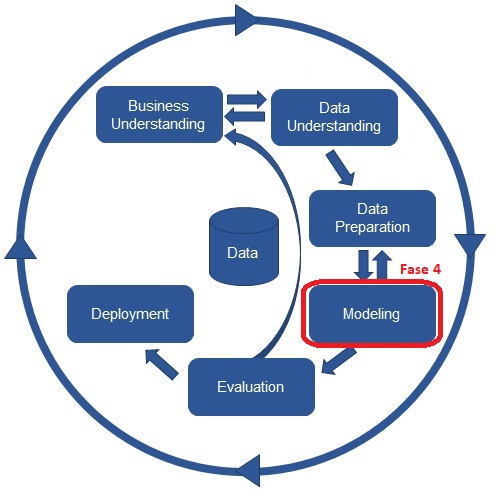

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn import metrics

### RandomForestClassifier

In [ ]:
target = df_avg['RainTomorrow']
prediccion = df_avg[['Rainfall','Temp9am','Temp3pm','Evaporation','Humidity','Pressure','Cloud','RainToday']]

In [ ]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(prediccion, target, test_size=0.25, random_state=78952)

In [ ]:

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_a, y_train_a)

RandomForestClassifier(max_depth=10, random_state=0)

###ExtraTreesClassifier

In [ ]:
target = df_avg['RainTomorrow']
prediccion = df_avg[['Rainfall','Temp9am','Temp3pm','Evaporation','Humidity','Pressure','Cloud','RainToday']]

In [ ]:
X_train_etc, X_test_etc, y_train_etc, y_test_etc = train_test_split(prediccion, target, test_size=0.25, random_state=700)

In [ ]:
excls = ExtraTreesClassifier(n_estimators=50, min_samples_split=50)

In [ ]:
excls.fit(X_train_etc, y_train_etc)

ExtraTreesClassifier(min_samples_split=50, n_estimators=50)

### BaggingClassifier

In [ ]:
target = df_avg['RainTomorrow']
prediccion = df_avg[['Rainfall','Temp9am','Temp3pm','Evaporation','Humidity','Pressure','Cloud','RainToday']]

In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(prediccion, target, test_size=0.25, random_state=700)

In [ ]:
bag = BaggingClassifier(base_estimator=None,max_samples=10)
bag.fit(X_train_b, y_train_b)


BaggingClassifier(max_samples=10)

### LabelPropagation

In [ ]:
target = df_avg['RainTomorrow']
prediccion = df_avg[['Rainfall','Temp9am','Temp3pm','Evaporation','Humidity','Pressure','Cloud','RainToday']]

In [ ]:
X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(prediccion, target, test_size=0.25, random_state=700)

In [ ]:
lab = LabelPropagation(gamma=0.1,n_neighbors=2)
lab.fit(X_train_lab, y_train_lab)

LabelPropagation(gamma=0.1, n_neighbors=2)

### LabelSpreading

In [ ]:
target = df_avg['RainTomorrow']
prediccion = df_avg[['Rainfall','Temp9am','Temp3pm','Evaporation','Humidity','Pressure','Cloud','RainToday']]

In [ ]:
X_train_labs, X_test_labs, y_train_labs, y_test_labs = train_test_split(prediccion, target, test_size=0.25, random_state=700)

In [ ]:
labs = LabelSpreading( n_neighbors=5)
labs.fit(X_train_labs, y_train_labs)

LabelSpreading(n_neighbors=5)

## Evaluation / Evaluación

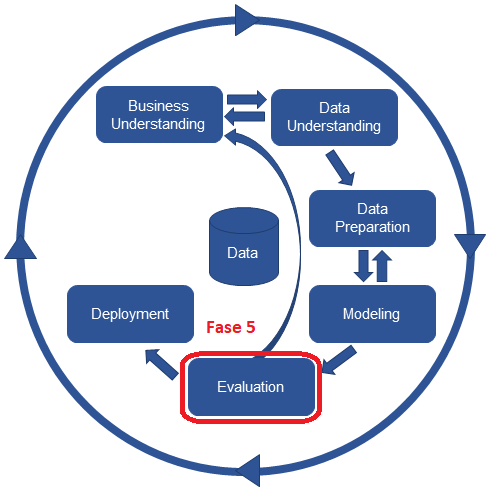

In [ ]:
#Guardando valores en lista para graficar evaluaciones
eje_exactitud=[]
eje_precision=[]
eje_sensibilidad=[]
eje_especifidad=[]
eje_f1=[]

### RandomForestClassifier

In [ ]:
y_pred_a=clf.predict(X_test_a)

In [ ]:
print("Score train: ", clf.score(X_train_a, y_train_a))
print("Score test: ", clf.score(X_test_a, y_test_a))


Score train:  0.8504859660277955
Score test:  0.7719346049046322


Con respecto a los score del entrenamiento es razonable que sea más alto esto se debe a que predice lo mismo con lo que se entrenó en cambio cuando pasamos los datos nuevos en este caso de test tiene un score de asertividad del 77% este es de los score más altos obtenidos en los estudios.

In [ ]:
a_matriz=metrics.confusion_matrix(y_test_a, y_pred_a)
print(a_matriz)

[[2247  211]
 [ 626  586]]


In [ ]:
datos_predict_a = clf.predict(X_test_a)

# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = a_matriz.ravel()

In [ ]:
#Es la cantidad de predicciones correctas, en base al total de predicciones realizadas
#Exactitud
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(y_test_a,datos_predict_a)


0.7719346049046322


0.7719346049046322

In [ ]:
#Precisión Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente.
#Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
#Precisión
precision = (vp)/(vp+fp)
print(precision)
precision_score(y_test_a,datos_predict_a) 


0.7352572145545797


0.7352572145545797

In [ ]:
#La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales
#Sensibilidad 
recall = (vp)/(vp+fn)
print(recall)
recall_score(y_test_a,datos_predict_a)


0.4834983498349835


0.4834983498349835

In [ ]:
#Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, 
#es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos.
#Especificidad
tnr = (vn)/(vn+fp)
tnr


0.9141578519121237

In [ ]:
#Es una combinacion global incluyendo la sensibilidad y precisión
#F1 Score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(y_test_a,datos_predict_a)


0.5833748133399701


0.5833748133399701

In [ ]:
#agregando valores de metricas a lista
eje_exactitud.append(exactitud)
eje_precision.append(precision)
eje_sensibilidad.append(recall)
eje_especifidad.append(tnr)
eje_f1.append(f1)

Separando los datos de la matriz de confusión podemos calcular las diferentes métricas para los modelos de clasificación entre ellos tenemos una exactitud cercana al 77% lo cual es aceptable para el estudio, continuando con la precisión del modelo la cual es cercana a 0735 la cual es un porcentaje de asertividad bastante ya que toma en cuenta los verdaderos positivos acertados por el modelo que al contrario de la sensibilidad mientras más alto el número mejor continuando con la sensibilidad tenemos un número elevado para los verdaderos negativos nos hace pensar que es donde más se equivocó el modelo, por último tenemos f1 que es la mezcla de los valores de precisión y sensibilidad del modelo.

### ExtraTreesClassifier

In [ ]:
y_pred_etc=excls.predict(X_test_etc)

In [ ]:
print("Score train: ",excls.score(X_train_etc, y_train_etc))
print("Score test: ",excls.score(X_test_etc, y_test_etc))

Score train:  0.7929875556362975
Score test:  0.7607629427792916


Con respecto a los score del entrenamiento es razonable que este sea más alto esto se debe a que predice lo mismo con lo que se entrenó en cambio cuando pasamos los datos nuevos en este caso de test tiene un score de asertividad del 76% lo cual nos muestra una inferioridad con respecto al modelo de random forest, aun no descartamos este modelo ya que a pesar de ser inferior, los porcentajes de train y test están más cercanos a los del modelo anterior.

In [ ]:
etc_matriz = metrics.confusion_matrix(y_test_etc, y_pred_etc)
print(etc_matriz)

[[2221  263]
 [ 615  571]]


In [ ]:
datos_predict = excls.predict(X_test_etc)

# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = etc_matriz.ravel()

In [ ]:
#Es la cantidad de predicciones correctas, en base al total de predicciones realizadas
#Exactitud
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(y_test_etc,datos_predict)

0.7607629427792916


0.7607629427792916

In [ ]:
#Precisión Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente.
#Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
#Precisión
precision = (vp)/(vp+fp)
print(precision)
precision_score(y_test_etc,datos_predict) 

0.684652278177458


0.684652278177458

In [ ]:
#La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales
#Sensibilidad 
recall = (vp)/(vp+fn)
print(recall)
recall_score(y_test_etc,datos_predict)

0.4814502529510961


0.4814502529510961

In [ ]:
#Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, 
#es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos.
#Especificidad
tnr = (vn)/(vn+fp)
tnr

0.894122383252818

In [ ]:
#F1 Score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(y_test_etc,datos_predict)

0.5653465346534654


0.5653465346534654

In [ ]:
#agregando valores de metricas a lista
eje_exactitud.append(exactitud)
eje_precision.append(precision)
eje_sensibilidad.append(recall)
eje_especifidad.append(tnr)
eje_f1.append(f1)

Para concluir con las evaluaciones de las métricas nos damos cuenta de que para Extra Trees Classifier tenemos una precisión menor con respecto al otro algoritmo de clasificación y lo mismo para las demás variables como sensibilidad sensibilidad y especificidad sobre todo recalcar que la especificidad es bastante alto para ser la fracción de verdaderos negativos, pero con respecto a f1 score tenemos una diferencia tan solo de 0.2 lo que haría a este modelo el segundo mejor para nuestros datos.

### BaggingClassifier

In [ ]:
y_pred_b=bag.predict(X_test_b)

In [ ]:
bag.score(X_train_b, y_train_b)

0.7024252884003996

In [ ]:
bag.score(X_test_b, y_test_b)


0.706267029972752

Con respecto a los score del testeo nos encontramos con un modelo que dio resultados bajo el 70% lo que nos causa que quede muy por debajo de los modelos vistos anteriormente  

In [ ]:
matriz_b =metrics.confusion_matrix(y_test_b, y_pred_b)
print(matriz_b)

[[2211  273]
 [ 805  381]]


In [ ]:
datos_predict = bag.predict(X_test_b)

# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = matriz_b.ravel()

In [ ]:
#Es la cantidad de predicciones correctas, en base al total de predicciones realizadas
#Exactitud
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(y_test_b,datos_predict)

0.706267029972752


0.706267029972752

In [ ]:
#Precisión Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente.
#Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
#Precisión
precision = (vp)/(vp+fp)
print(precision)
precision_score(y_test_b,datos_predict)

0.5825688073394495


0.5825688073394495

In [ ]:
#La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales
#Sensibilidad 
recall = (vp)/(vp+fn)
print(recall)
recall_score(y_test_b,datos_predict)

0.321247892074199


0.321247892074199

In [ ]:
#Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, 
#es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos.
#Especificidad
tnr = (vn)/(vn+fp)
tnr

0.8900966183574879

In [ ]:
#F1 Score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(y_test_b,datos_predict)

0.4141304347826087


0.4141304347826087

In [ ]:
#agregando valores de metricas a lista
eje_exactitud.append(exactitud)
eje_precision.append(precision)
eje_sensibilidad.append(recall)
eje_especifidad.append(tnr)
eje_f1.append(f1)

Nos encontramos con un modelo que en general en sus metricas nos entrega resultados muy por debajo de lo esperado esto concluye en que este modelo sera excluido para su selección en el futuro ya que existen mejores opciones que resuelven la problematica 

### LabelPropagation

In [ ]:
y_pred_lab=lab.predict(X_test_lab)
lab.score(X_train_lab, y_train_lab)

0.8037060586792624

In [ ]:
lab.score(X_test_lab, y_test_lab)

0.753133514986376

En este modelo nos encontramos con un buen resultado en su score lleganto a un 75% de acertividad utilizando el score de su testeo cercano al mejor modelo que vendria siendo random forest 

In [ ]:
matriz_lab =metrics.confusion_matrix(y_test_lab, y_pred_lab)
print(matriz_lab)


[[2297  187]
 [ 719  467]]


In [ ]:
datos_predict = lab.predict(X_test_lab)

# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = matriz_lab.ravel()

In [ ]:
#Es la cantidad de predicciones correctas, en base al total de predicciones realizadas
#Exactitud
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(y_test_lab,datos_predict)

0.753133514986376


0.753133514986376

In [ ]:
#Precisión Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente.
#Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
#Precisión
precision = (vp)/(vp+fp)
print(precision)
precision_score(y_test_lab,datos_predict)

0.7140672782874617


0.7140672782874617

In [ ]:
#La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales
#Sensibilidad 
recall = (vp)/(vp+fn)
print(recall)
recall_score(y_test_lab,datos_predict)

0.39376053962900504


0.39376053962900504

In [ ]:
#Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, 
#es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos.
#Especificidad
tnr = (vn)/(vn+fp)
tnr

0.9247181964573269

In [ ]:
#F1 Score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(y_test_lab,datos_predict)

0.5076086956521738


0.5076086956521738

In [ ]:
#agregando valores de metricas a lista
eje_exactitud.append(exactitud)
eje_precision.append(precision)
eje_sensibilidad.append(recall)
eje_especifidad.append(tnr)
eje_f1.append(f1)

Bueno en este modelo en general nos entregan resultados variados en sus metricas pero si nos enfocamos en su F1 Score esta muy bajo llegando al 50% de acertividad eso causa que su precisión y sensibilidad sean parte del azar 

### LabelSpreading

In [ ]:
y_pred_labs = labs.predict(X_test_labs)
labs.score(X_train_labs, y_train_labs)


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


1.0

In [ ]:
labs.score(X_test_labs, y_test_labs)

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.7299727520435967

En este modelo nos entrego un score del 72% de acertividad no es un mal score pero tampoco es el mejor ya que tenemos 2 modelos sobre su score por eso es que debemos ver sus metricas individuales para saber si es te modelo nos entrega mejores resultados 

In [ ]:
matriz_labs =metrics.confusion_matrix(y_test_labs, y_pred_labs)
print(matriz_labs)


[[2028  456]
 [ 535  651]]


In [ ]:
datos_predict = labs.predict(X_test_labs)

# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = matriz_labs.ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [ ]:
#Es la cantidad de predicciones correctas, en base al total de predicciones realizadas
#Exactitud
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(y_test_labs,datos_predict)


0.7299727520435967


0.7299727520435967

In [ ]:
#Precisión Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente.
#Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
#Precisión
precision = (vp)/(vp+fp)
print(precision)
precision_score(y_test_labs,datos_predict)


0.5880758807588076


0.5880758807588076

In [ ]:
#La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales
#Sensibilidad 
recall = (vp)/(vp+fn)
print(recall)
recall_score(y_test_labs,datos_predict)


0.5489038785834739


0.5489038785834739

In [ ]:
#Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, 
#es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos.
#Especificidad
tnr = (vn)/(vn+fp)
tnr

0.8164251207729468

In [ ]:
#F1 Score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(y_test_labs,datos_predict)

0.5678150894025294


0.5678150894025294

In [ ]:
#agregando valores de metricas a lista
eje_exactitud.append(exactitud)
eje_precision.append(precision)
eje_sensibilidad.append(recall)
eje_especifidad.append(tnr)
eje_f1.append(f1)

Este modelo en general fue un modelo mas equilibrado si lo comparamos con el Label Propagation podemos notar que su F1 score supero el 50% esto muestra que respecto a su precisión y sensibilidad funciona mejor que el Label Propagation pero aun asi el Random fores sigue siendo el mejor modelo en general en sus metricas 

### Heat map para matriz de confusión

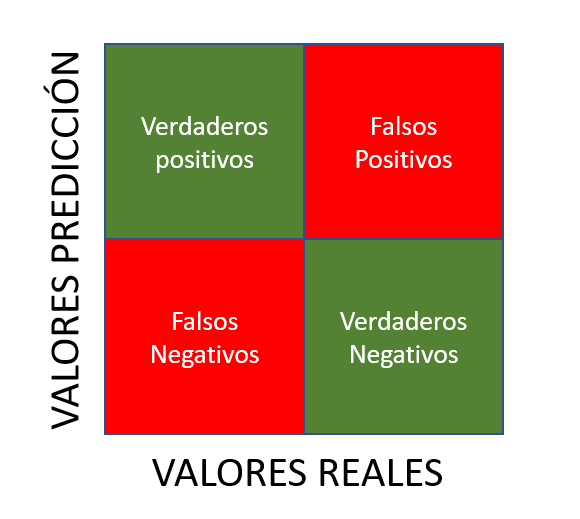

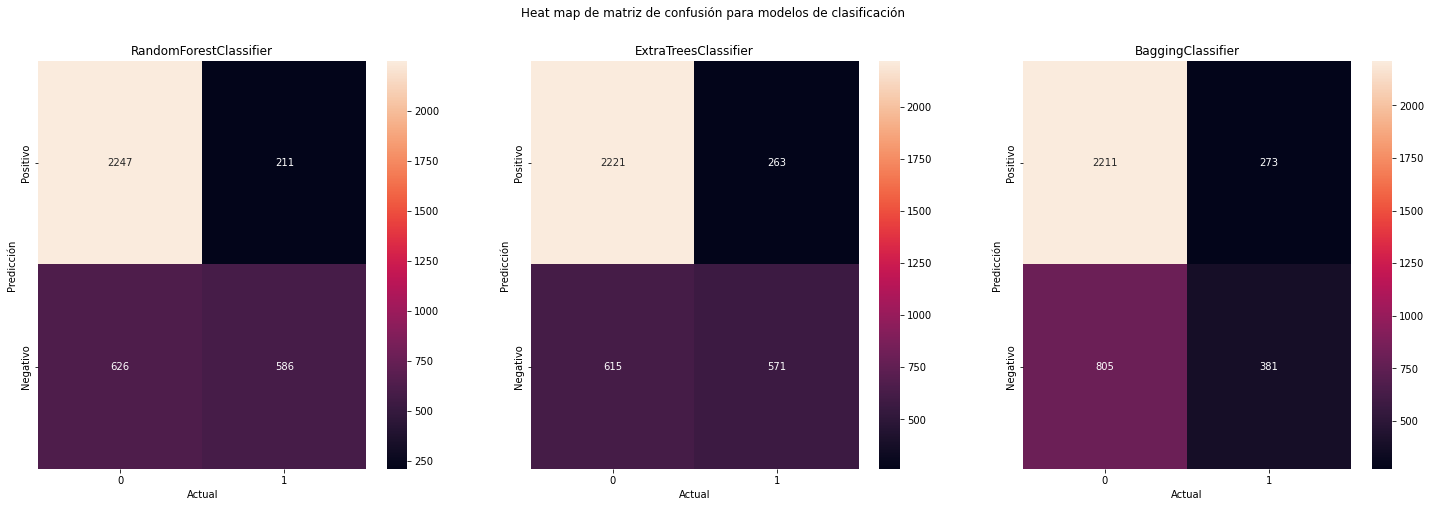

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(25, 7.5))
fig.suptitle("Heat map de matriz de confusión para modelos de clasificación")

# mapa de calor para RandomForestClassifier
a = sns.heatmap(a_matriz,annot=True, fmt="d", ax=axes[0])
a.set_title("RandomForestClassifier")
a.yaxis.set_ticklabels(["Positivo","Negativo"])
a.set_xlabel('Actual')
a.set_ylabel('Predicción')

# mapa de calor para ExtraTreesClassifier
etc = sns.heatmap(etc_matriz,annot=True, fmt="d", ax=axes[1])
etc.set_title("ExtraTreesClassifier")
etc.yaxis.set_ticklabels(["Positivo","Negativo"])
etc.set_xlabel('Actual')
etc.set_ylabel('Predicción')

# mapa de calor para BaggingClassifier
b = sns.heatmap(matriz_b,annot=True, fmt="d",ax=axes[2])
b.set_title("BaggingClassifier")
b.yaxis.set_ticklabels(["Positivo","Negativo"])
b.set_xlabel('Actual')
b.set_ylabel('Predicción')
plt.show()

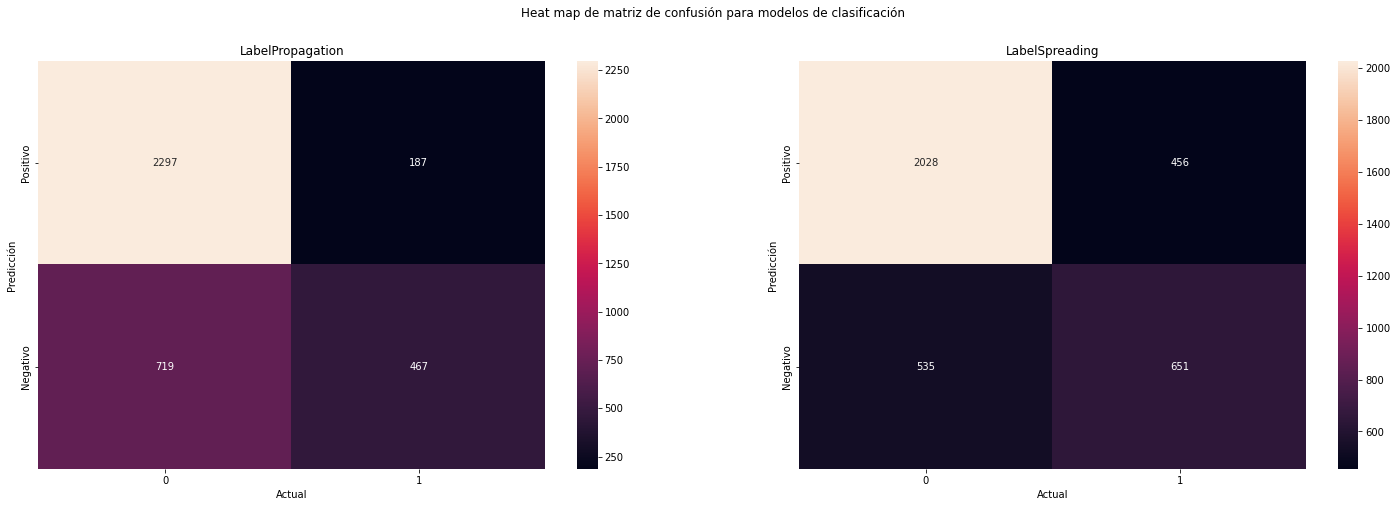

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(25, 7.5))
fig.suptitle("Heat map de matriz de confusión para modelos de clasificación")

# mapa de calor para LabelPropagation
lab = sns.heatmap(matriz_lab,annot=True, fmt="d", ax=axes[0])
lab.set_title("LabelPropagation")
lab.yaxis.set_ticklabels(["Positivo","Negativo"])
lab.set_xlabel('Actual')
lab.set_ylabel('Predicción')

# mapa de calor para LabelSpreading
labs = sns.heatmap(matriz_labs,annot=True, fmt="d", ax=axes[1])
labs.set_title("LabelSpreading")
labs.yaxis.set_ticklabels(["Positivo","Negativo"])
labs.set_xlabel('Actual')
labs.set_ylabel('Predicción')
plt.show()

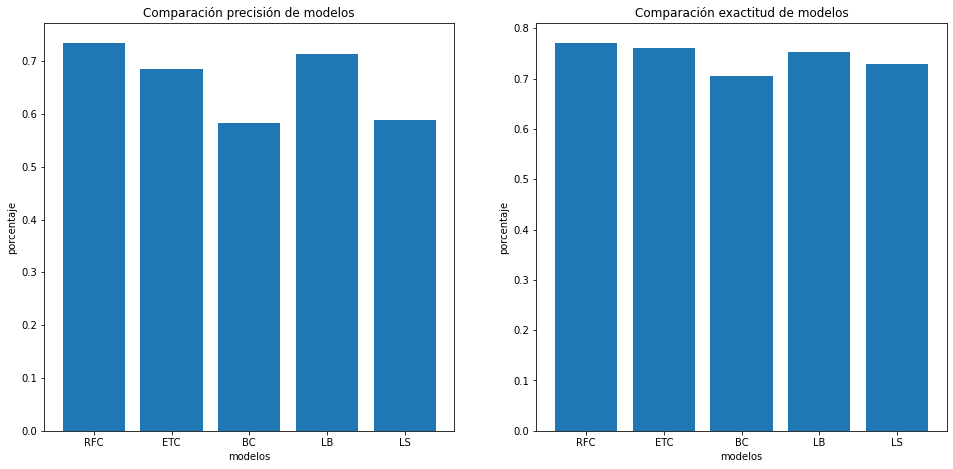

In [ ]:
plt.figure(figsize=(25, 7.5))


nombre_modelos=['RFC','ETC','BC','LB','LS']

ax = plt.subplot(1,3, 2)
plt.bar(nombre_modelos,eje_precision)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparación precisión de modelos')

ax = plt.subplot(1,3, 3)
plt.bar(nombre_modelos,eje_exactitud)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparación exactitud de modelos')

plt.show()


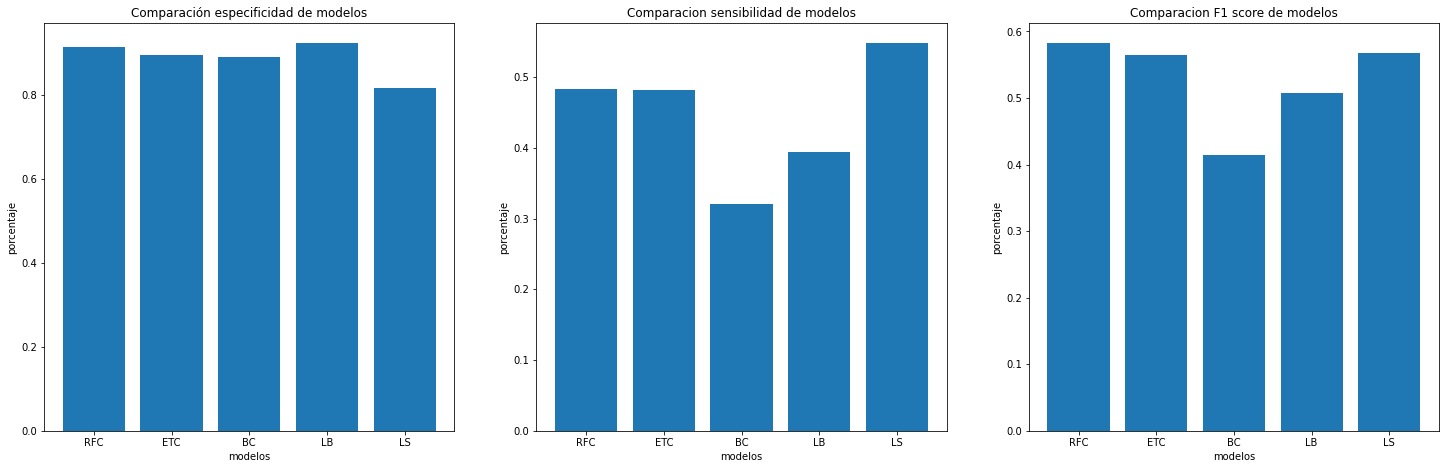

In [ ]:
plt.figure(figsize=(25, 7.5))

ax = plt.subplot(1,3, 1)
plt.bar(nombre_modelos,eje_especifidad)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparación especificidad de modelos')

ax = plt.subplot(1,3, 2)
plt.bar(nombre_modelos,eje_sensibilidad)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparacion sensibilidad de modelos')

ax = plt.subplot(1,3, 3)
plt.bar(nombre_modelos,eje_f1)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparacion F1 score de modelos')
plt.show()

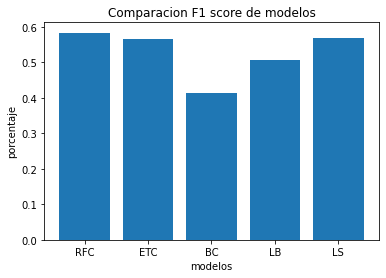

In [ ]:
plt.bar(nombre_modelos,eje_f1)
plt.ylabel('porcentaje')
plt.xlabel('modelos')
plt.title('Comparacion F1 score de modelos')

plt.show()

In [ ]:
eje_f1

[0.5833748133399701,
 0.5653465346534654,
 0.4141304347826087,
 0.5076086956521738,
 0.5678150894025294]

##Conclusión

En conclusión, dentro del proceso de selección realizada se probaron distintos modelos enfocándonos en modelos de tipo clasificación supervisados, ya que el objetivo de predicción de nuestro modelo esta enfocado en saber si llueve o no llueve el día de mañana para esto los mejores resultados rondaron en los modelos de tipo clasificación.
En la selección nos enfocamos en variadas métricas que se mostraron anteriormente en general los mejores resultados generales están orientados al modelo de Random Forest Classifier , que se destacó en su score, precisión, exactitud y F1 score en los únicos que decayó fue en su especificidad y sensibilidad pero aun así manteniéndose entre los mejores resultados de esta manera. Por esto la selección de nuestro proyecto es el modelo Random Forest Classifier.